In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 7.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

In [4]:
ROOT_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project/yolo'

In [5]:
# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [8]:
# Train the model with augmented dataset for 100 epochs
results = model.train(data=os.path.join(ROOT_DIR, 'yolo_config_augmented.yaml'), epochs=100, batch=32, imgsz=640)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/Visionary-Unicorns-Project/yolo/yolo_config_augmented.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!scp -r /content/runs/detect/train '/content/drive/My Drive/Visionary-Unicorns-Project/runs/detect'

In [7]:
val_results = model.val()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/drive/My Drive/Visionary-Unicorns-Project/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                   all         72         72      0.843      0.835       0.87      0.658
               penguin         72         36      0.963       0.73      0.893      0.724
                turtle         72         36      0.722       0.94      0.846      0.592
Speed: 4.7ms preprocess, 13.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# load the model just trained
trained_model = YOLO('./runs/detect/train/weights/best.pt')

In [ ]:
# Validate the model
metrics = trained_model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/drive/My Drive/Visionary-Unicorns-Project/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                   all         72         72      0.904      0.903      0.922      0.729
               penguin         72         36      0.983      0.889      0.957      0.792
                turtle         72         36      0.824      0.917      0.888      0.667
Speed: 1.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
# Function to perform object detection
def detection(img_path, model):
  # Load image
  img = cv2.imread(img_path)

  # Perform object detection
  results = model.predict(source = img)

  # Extract bounding boxes
  boxes = results[0].boxes
  print(f'boxes length = {len(boxes)}')

  bounding_boxes = []

  for box in boxes:
    left, top, right, bottom = box.xyxy[0]
    # left, top, right, bottom = int(left), int(top), int(right), int(bottom)
    left, top, right, bottom = int(math.ceil(left)), int(math.ceil(top)), int(math.ceil(right)), int(math.ceil(bottom))
    print(left, top, right, bottom)
    print(f'box = {box}')

    cls_id = int(list(box.cls)[0])

    print(f'cls_id = {cls_id}')

    bounding_boxes.append((left, top, right, bottom))

  return bounding_boxes

In [ ]:
VAL_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project'


0: 224x224 1 penguin, 11.2ms
Speed: 1.2ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 224)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes length = 1
213 90 534 615
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[212.7314,  89.5929, 533.0101, 614.0706,   0.8771,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.8771], device='cuda:0')
data: tensor([[212.7314,  89.5929, 533.0101, 614.0706,   0.8771,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[372.8707, 351.8317, 320.2787, 524.4777]], device='cuda:0')
xywhn: tensor([[0.5826, 0.5497, 0.5004, 0.8195]], device='cuda:0')
xyxy: tensor([[212.7314,  89.5929, 533.0101, 614.0706]], device='cuda:0')
xyxyn: tensor([[0.3324, 0.1400, 0.8328, 0.9595]], device='cuda:0')
cls_id = 0


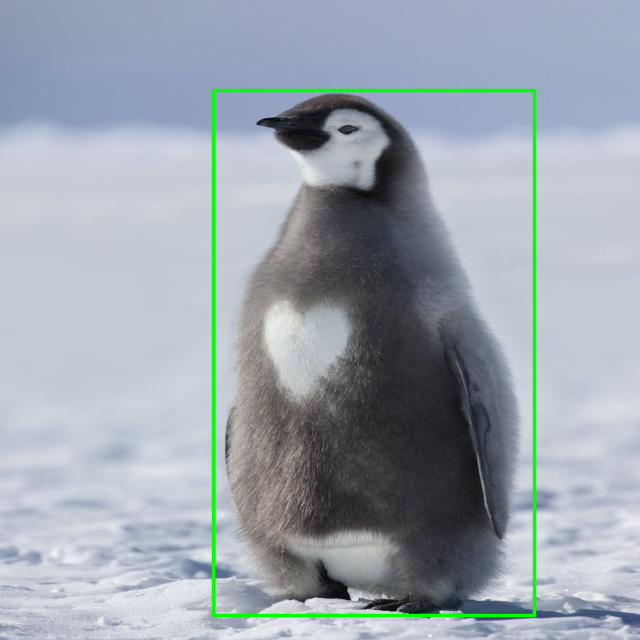

In [ ]:
# Example usage
image_path = os.path.join(VAL_DIR, 'data/original/valid/image_id_000.jpg')

image = cv2.imread(image_path)

bounding_boxes = detection(image_path, model)

# Draw bounding boxes on the image
for (left, top, right, bottom) in bounding_boxes:
    start_point = (left, top)
    end_point = (right, bottom)
    color = (0, 255, 0)
    thickness = 2
    lineType = cv2.LINE_AA
    cv2.rectangle(image, start_point, end_point, color, thickness, lineType)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()